In [2]:
############## DIABETIES DATASET #################

In [3]:
#####importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import statsmodels.formula.api as smf
from scipy.stats import shapiro,levene

## DIABETIES DATASET

In [4]:
########## importing the data ########################
data=pd.read_csv('diabetes.csv')
#checking the head of the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#describing the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#getting the information regarding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#checking the shape of the data
data.shape

(768, 9)

## EDA

In [8]:
#checking for null values in the data and performing EDA
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#getting the individua count of the outcome yes or no in the dataset
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#dropping the outcome in the x and considering it in y as y is the target variable
x=data.drop('Outcome',axis=1)
x.head()
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## PLOTS

C:\Users\sss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


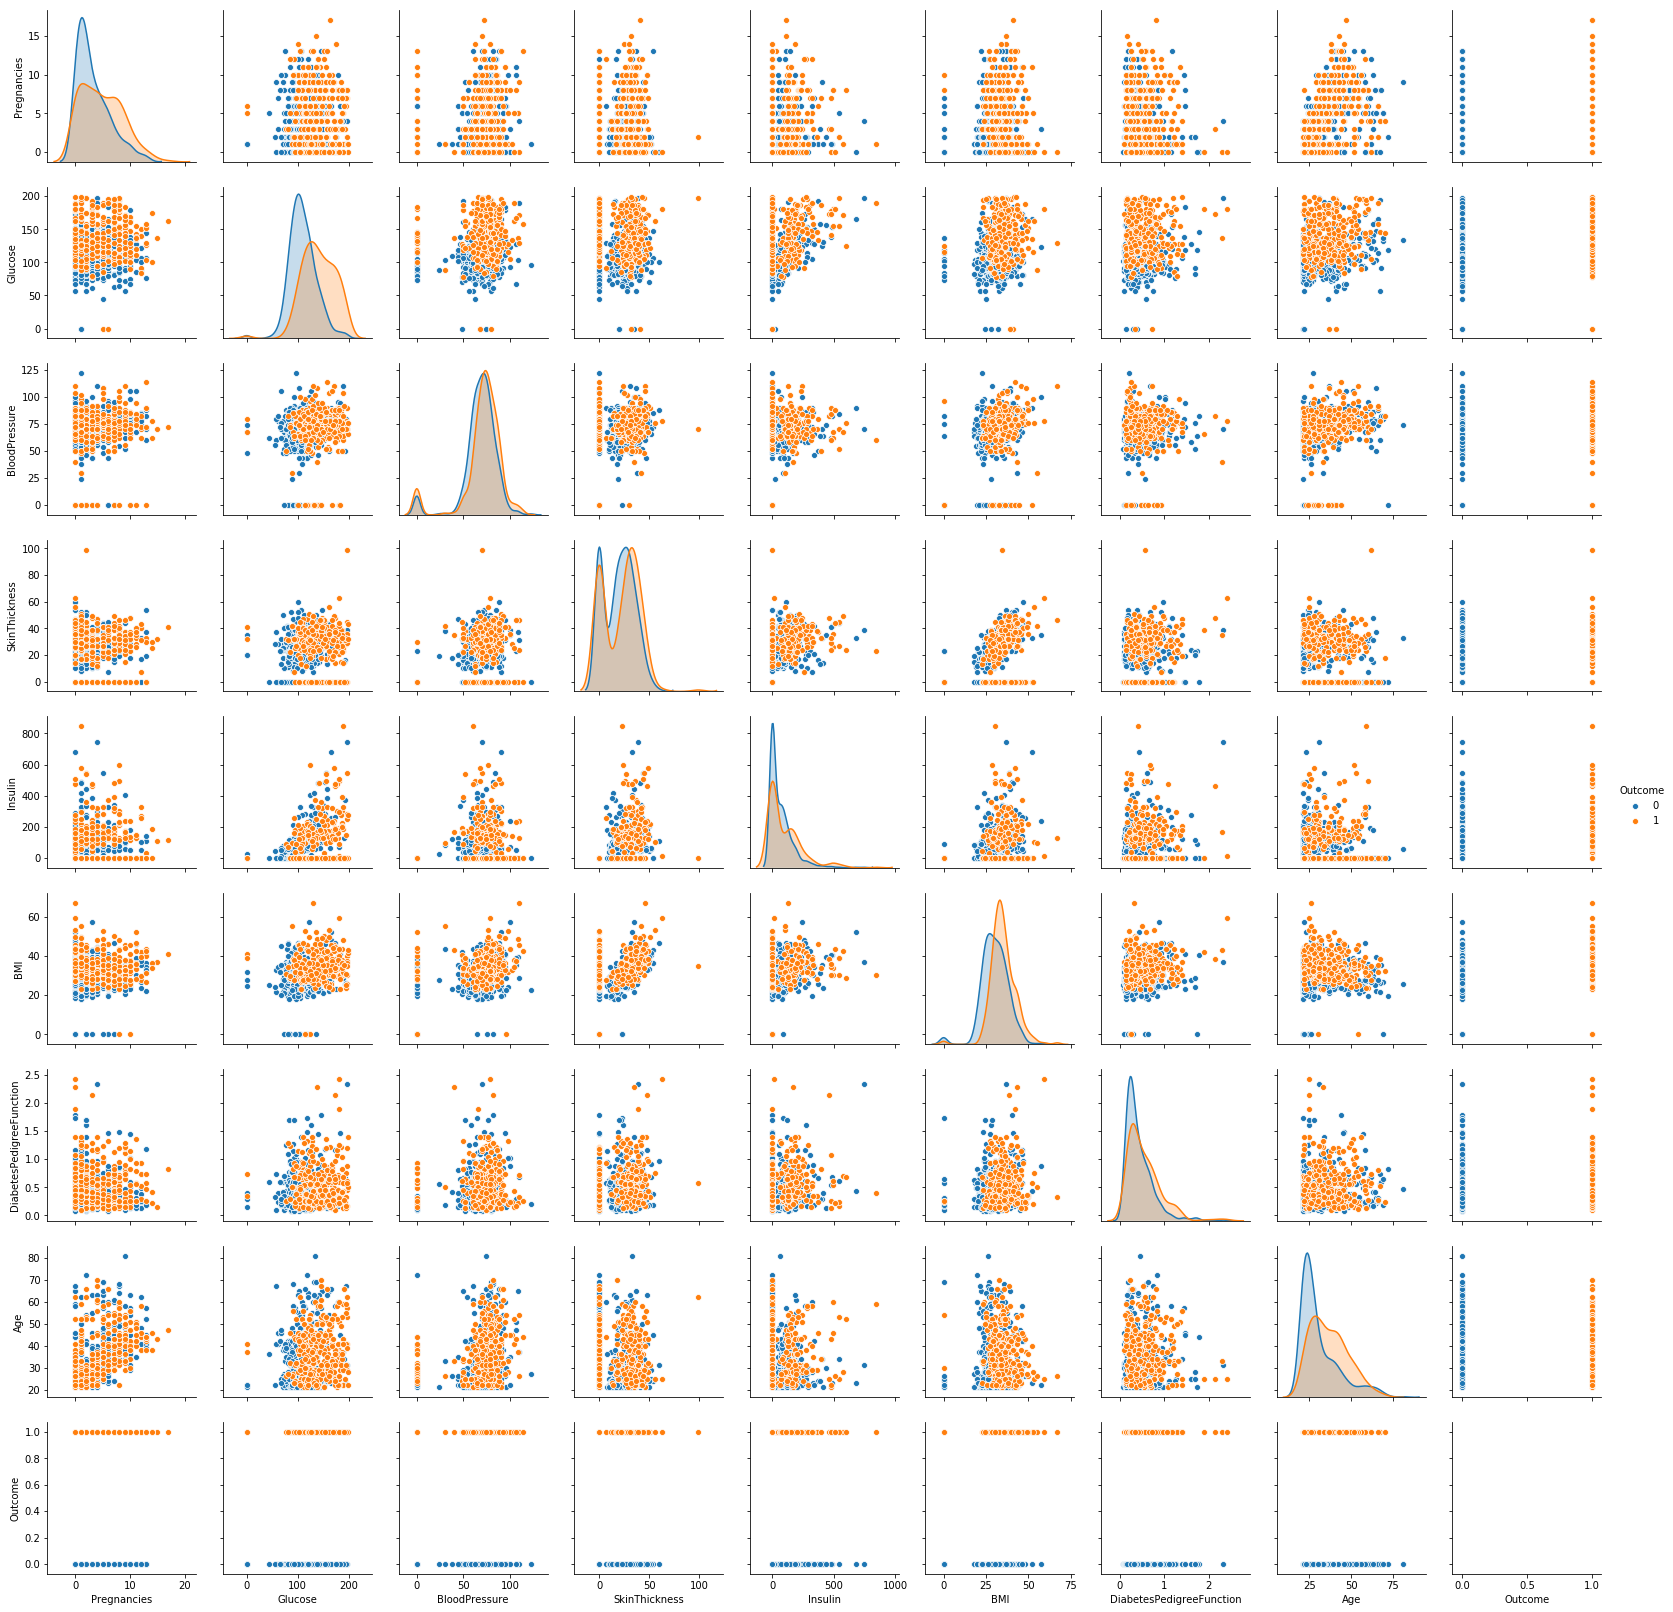

In [47]:
#pairplot to check the distribution of the data
sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
plt.show()

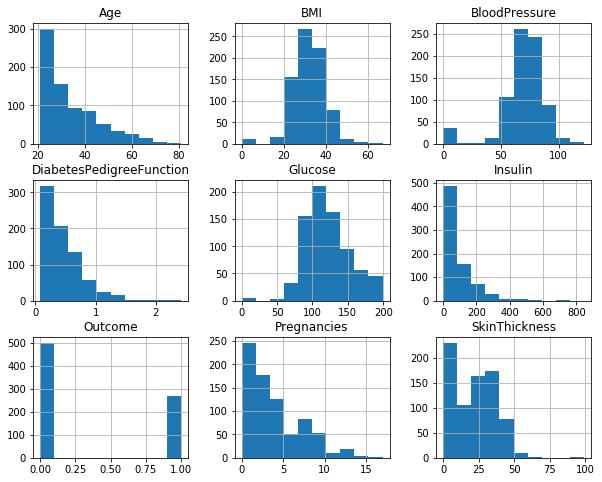

In [11]:
#### plotting a HISTOGRAM on the data
data.hist(figsize=(10,8))
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

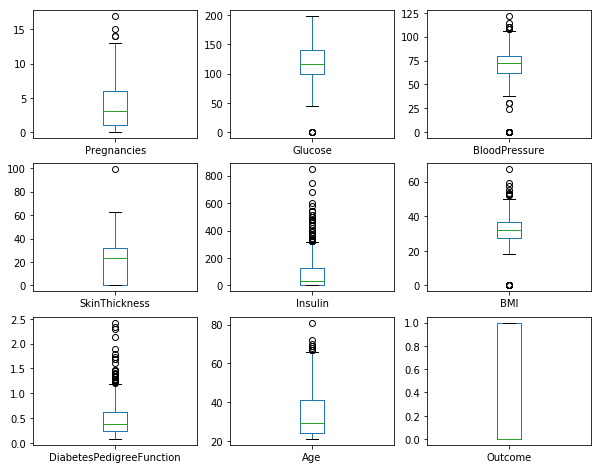

In [12]:
#### BOXPLOT for checking the outliers
data.plot(kind= 'box' , subplots=True,layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

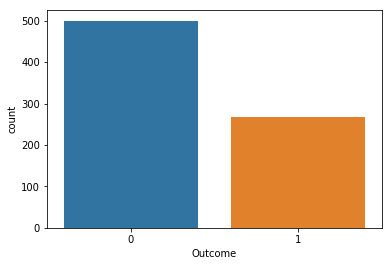

In [29]:
#plotting the outcome yes or no for the data
sns.countplot(data['Outcome'])

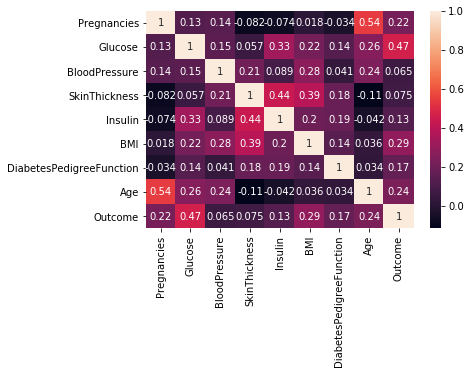

In [13]:
#### checking the correlation in matrix for variables using HEATMAP
import seaborn as sns
sns.heatmap(data.corr(), annot = True)

## SPLITTING THE DATA

In [14]:
X=data.iloc[:,:-1]
X.head()
Y=data.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [31]:
#### splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=100)

## DATA SCALING

In [32]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\sss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sss\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sss\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## BUILDING A LOGISTIC REGRESSION  MODEL

In [33]:
#logistic regression model
model=LogisticRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
ypred

C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## CHECKING FOR THE ACCURACY WITH THE METRICS

In [34]:
# accuracy score
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,ypred)
print(accuracy)

0.7407407407407407


[[118  23]
 [ 33  42]]


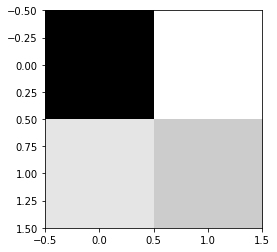

In [35]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)
plt.imshow(cm, cmap='binary')

In [36]:
#sensitivity and specificity check
tpr=cm[1,1]/cm[1,:].sum()
print(tpr*100)
tnr=cm[0,0]/cm[0,:].sum()
print(tnr*100)

56.00000000000001
83.68794326241135


0.6984397163120568


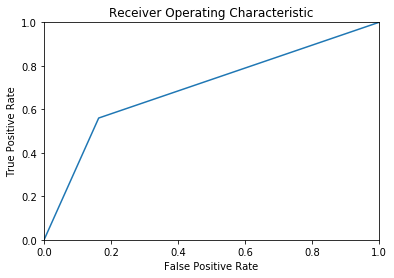

In [37]:
#checking roc and auc curves
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,ypred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

## BUILDING A DECISION TREE CLASSIFIER

In [38]:
#### importing the classifier and building the model
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## ACCURACY SCORE USING GINI INDEX

In [40]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test, ypred))
print("Recall:",recall_score(y_test, ypred, average="weighted"))
print("Precision",precision_score(y_test, ypred, average="weighted"))
print("F1 Score:",f1_score(y_test, ypred, average="weighted"))
print(metrics.classification_report(y_test,ypred))

Accuracy: 0.7407407407407407
Recall: 0.7407407407407407
Precision 0.7344767079866417
F1 Score: 0.7359208523592086
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.65      0.56      0.60        75

   micro avg       0.74      0.74      0.74       216
   macro avg       0.71      0.70      0.70       216
weighted avg       0.73      0.74      0.74       216



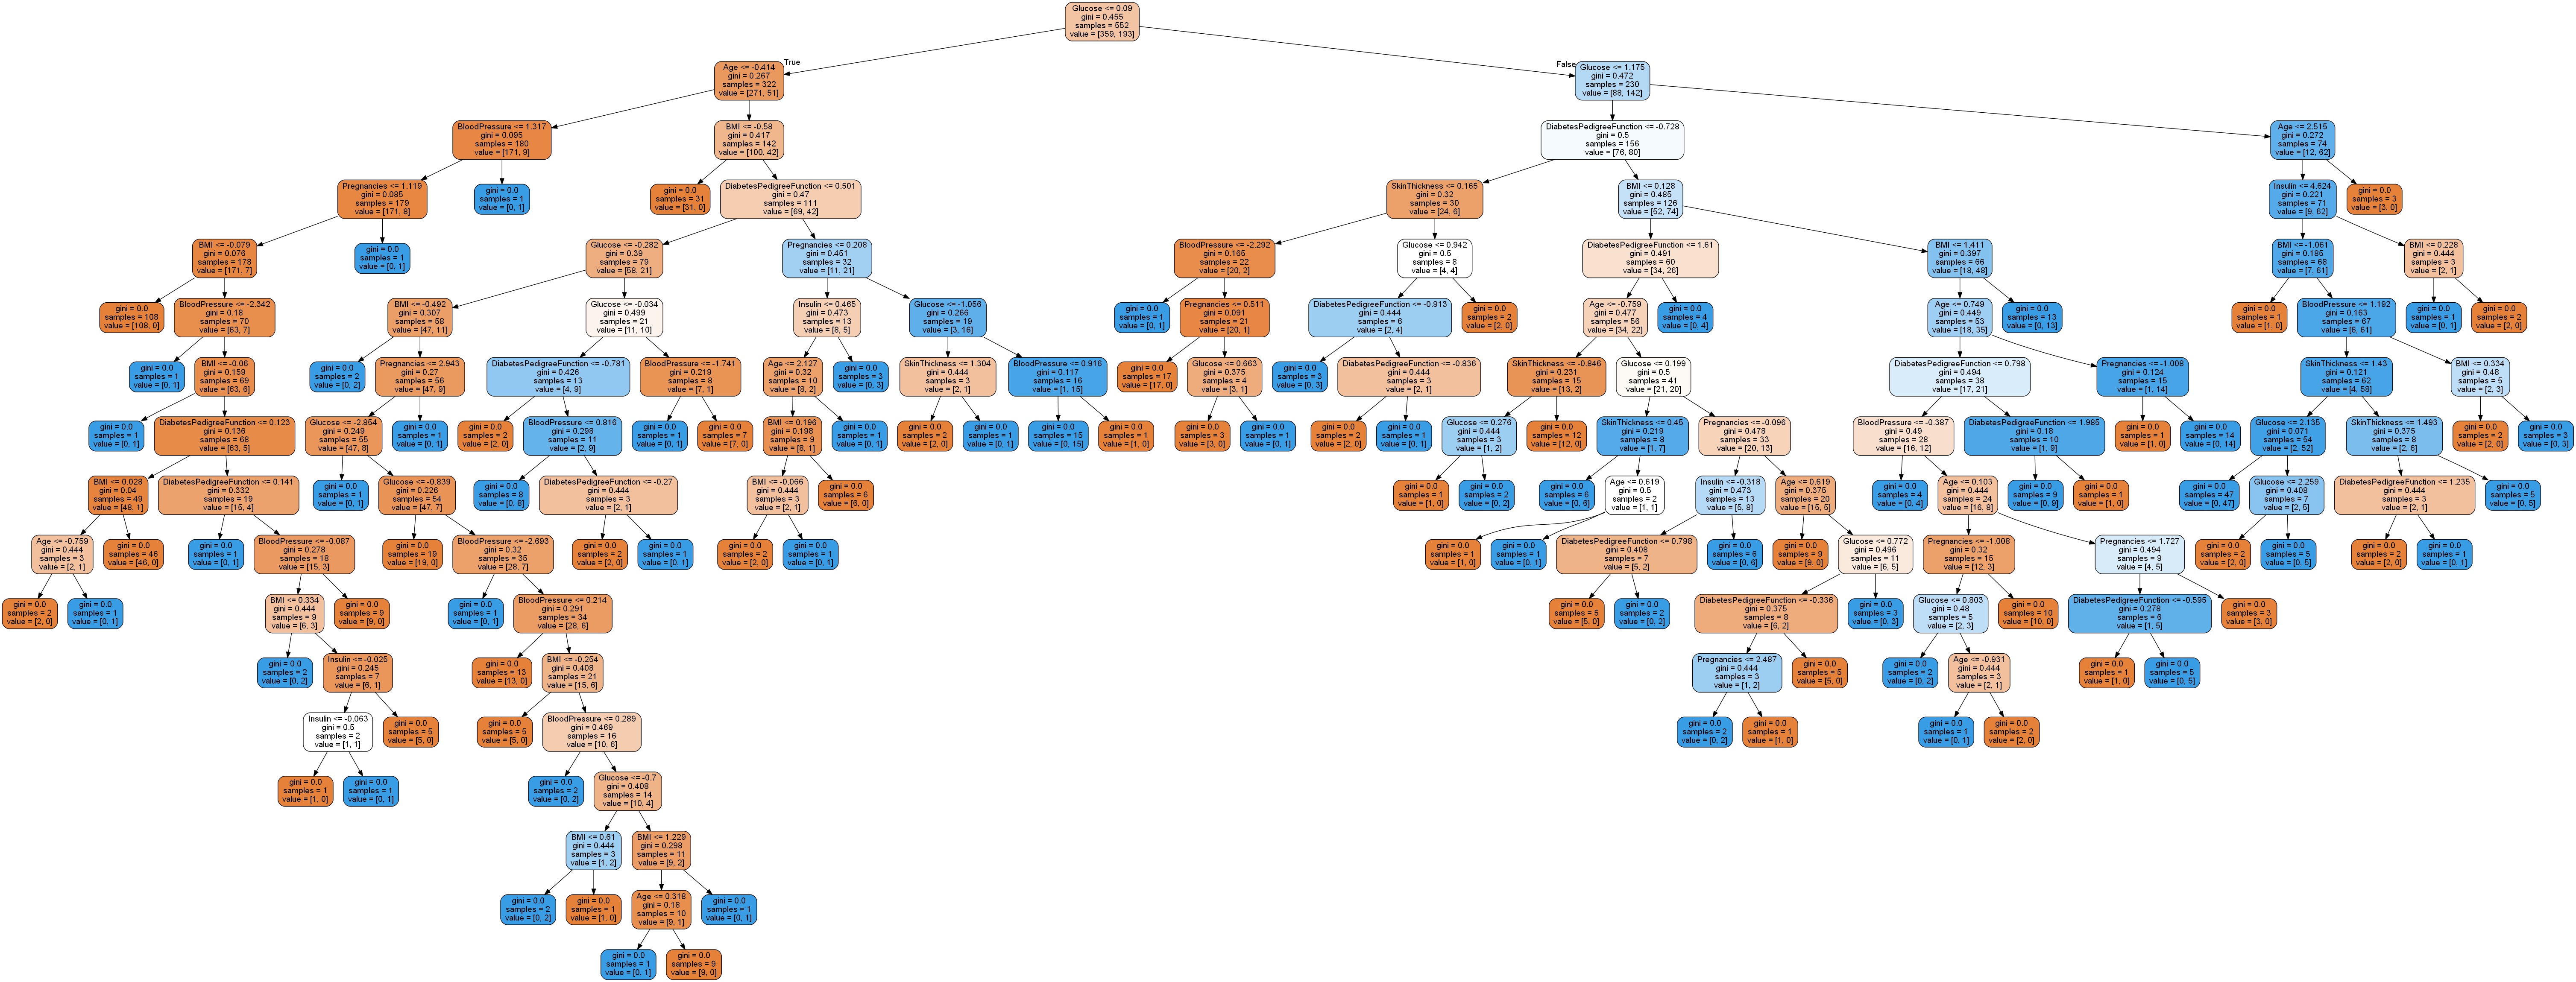

In [43]:

dot_data = tree.export_graphviz(model,
                                feature_names=X.columns,
                                out_file='tree1.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree1.dot > tree1.png

from IPython.display import Image
Image(filename='tree1.png')

## ACCURACY SCORE USING ENTROPY

0.7407407407407407
0.7407407407407407
0.7344767079866417
0.7359208523592086
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.65      0.56      0.60        75

   micro avg       0.74      0.74      0.74       216
   macro avg       0.71      0.70      0.70       216
weighted avg       0.73      0.74      0.74       216



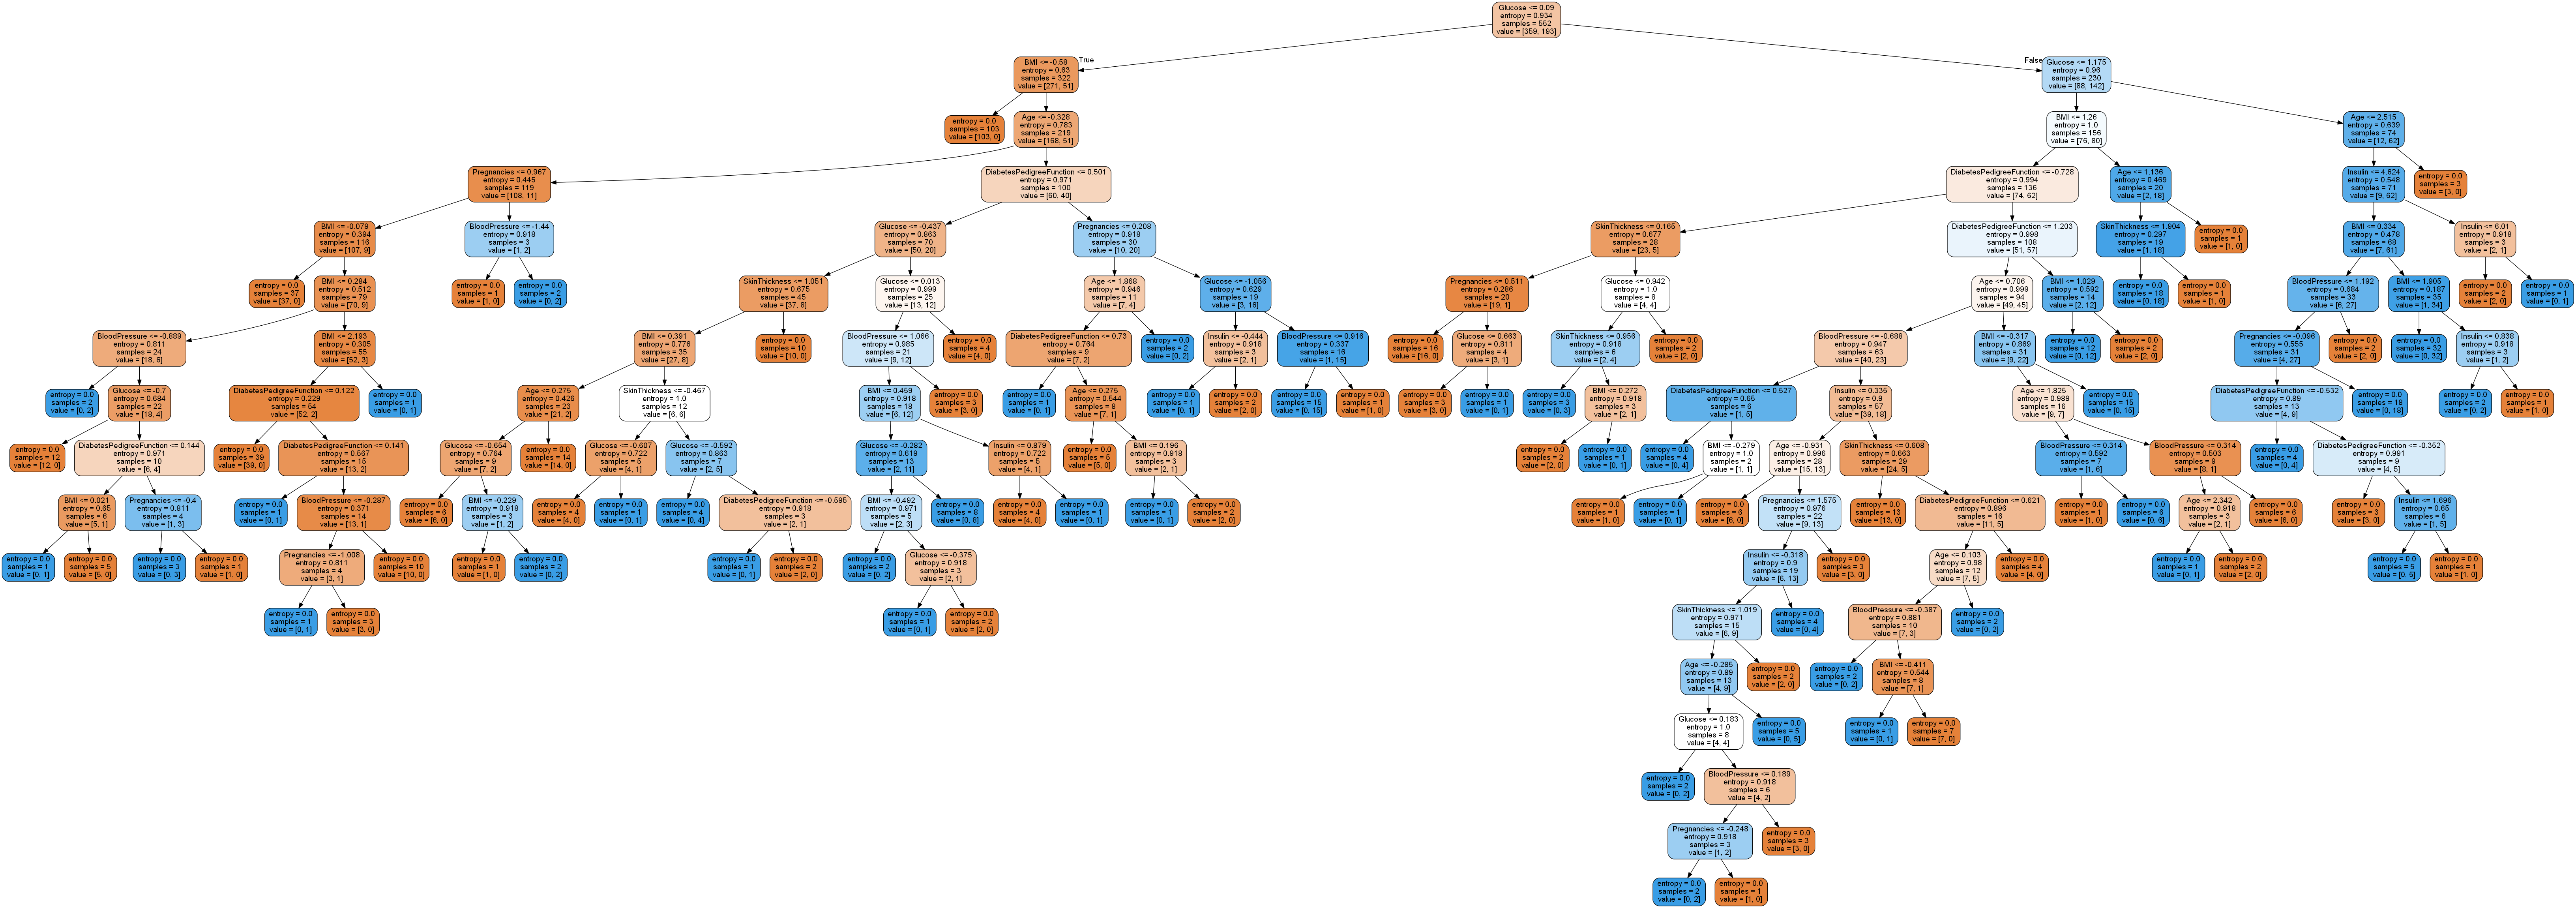

In [46]:
model1 = tree.DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train, y_train)
preds= model1.predict(X_test)
print(accuracy_score(y_test, ypred))
print(recall_score(y_test, ypred, average="weighted"))
print(precision_score(y_test, ypred, average="weighted"))
print(f1_score(y_test, ypred, average="weighted"))
print(metrics.classification_report(y_test,ypred))

dot_data = tree.export_graphviz(model1,
                                feature_names=X.columns,
                                out_file='tree1.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree1.dot > tree1.png

from IPython.display import Image
Image(filename='tree1.png')


## BUILDING A RANDOM FOREST CLASSIFIER

In [48]:
#importing the random forest classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1)


In [49]:
# fitting the model and checking the accuracy score
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_predict))

0.7864583333333334


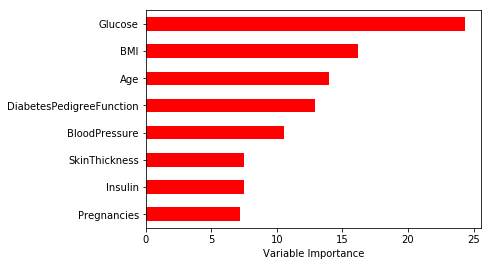

In [50]:
#checking for top 3 variables in the given dataset
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## BUILDING A RANDOM FOREST CLASSIFIER WITH TOP 3 VARIABLES

In [53]:
X = data[['Glucose', 'BMI', 'Age']]
y = data['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_predict))


0.7395833333333334


## BUILDING A K-NEAREST NEIGHBOURS CLASSIFIER

In [54]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

x,y = data.drop('Outcome', axis = 1), data['Outcome']
# x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']

knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 

In [55]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [56]:
display (x_train[:5])
print ()
display (x_test[:5])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [57]:
knn = KNeighborsClassifier(n_neighbors = 3)

# x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']

knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.7359307359307359


In [59]:
knn = KNeighborsClassifier(n_neighbors = 10, p = 12)
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(knn.fit(x, y),
                        x_train,y_train, cv = 10)
print(CVscore)
print(CVscore.mean())

[0.63636364 0.72727273 0.69090909 0.72222222 0.67924528 0.77358491
 0.69811321 0.71698113 0.81132075 0.64150943]
0.709752239374881


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, p=6, metric='minkowski')
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))


The accuracy of the knn classifier is 0.78 out of 1 on training data
The accuracy of the knn classifier is 0.76 out of 1 on test data


In [62]:
from sklearn.neighbors import KNeighborsClassifier
neig = np.arange(1, 20)
train_score_knn=[]
test_score_knn=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(x_train, y_train)
    train_score_knn.append(knn.score(x_train, y_train))
    test_score_knn.append(knn.score(x_test, y_test))
#     print('For k value=',i)
#     print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
#     print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))
#     print()


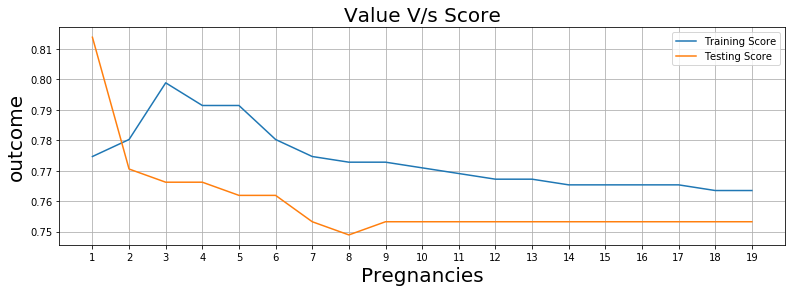

Best score is 0.8138528138528138 with K = 1


In [63]:
# Plot
plt.figure(figsize=[13,4])
plt.plot(neig, train_score_knn, label = 'Training Score')
plt.plot(neig, test_score_knn, label = 'Testing Score')
plt.legend()
plt.title('Value V/s Score',fontsize=20)
plt.xlabel('Pregnancies',fontsize=20)
plt.ylabel('outcome',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best score is {} with K = {}".format(np.max(test_score_knn),1+test_score_knn.index(np.max(test_score_knn))))

## BUILDING A NAIVE BAYES CLASSIFIER

In [69]:
X=data.iloc[:,:-1].values
X
Y=data.iloc[:,-1].values
Y[:5]
# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=100) 

In [70]:
#importing naive bayes classifier and building the model
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

## EVALUATING THE MODEL USING METRICS

0.5793103448275861
0.7175925925925926


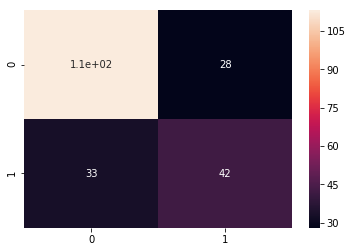

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)

In [73]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       141
           1       0.60      0.56      0.58        75

   micro avg       0.72      0.72      0.72       216
   macro avg       0.69      0.68      0.68       216
weighted avg       0.71      0.72      0.72       216



## K-FOLD VAIDATION

In [74]:
#importing k-fold
from sklearn.model_selection import KFold

In [77]:
#performing k-fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=2)
acc=[]
au=[]
for train,test in kf.split(X,Y):
    M=LogisticRegression()
    M.fit(X_train,y_train)
    y_pred=M.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_=roc_curve(y_test,y_pred)
    au.append(auc(fpr,tpr))
    
print("Cross-validated AUC Mean Score:%.2f%%" % np.mean(au))
print("Cross-validated AUC Var Score:%.5f%%" % np.var(au,ddof=1))


Cross-validated AUC Mean Score:0.68%
Cross-validated AUC Var Score:0.00000%


C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin